In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('googleplaystore.csv')

# Data Preprocessing

In [2]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8893,WhatsVPN - Unlimited Free VPN,TOOLS,4.7,24985,7.8M,"500,000+",Free,0,Everyone,Tools,"July 27, 2018",2.2.927,4.1 and up
6335,BJ card game blackjack,GAME,NaN,3,21M,500+,Free,0,Teen,Card,"December 2, 2016",1.0,2.3 and up
3592,Baby Sleep: White noise lullabies for newborns,PARENTING,4.6,62386,3.4M,"1,000,000+",Free,0,Everyone,Parenting,"June 12, 2018",2.7,4.0 and up
7578,CM FILE MANAGER Pro,BUSINESS,4.2,2359,2.7M,"10,000+",Paid,$2.99,Everyone,Business,"February 16, 2016",1.16.9,1.6 and up
8702,Best DP and Status,SOCIAL,4.2,93,5.6M,"10,000+",Free,0,Teen,Social,"November 29, 2017",7.6.5,4.1 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Data Cleaning

How many values are missing or have duplicates?

In [5]:
print('Number of duplicates:',df.duplicated().sum(),'\n')


print('Number of missing values:',df.isna().sum().sum())

Number of duplicates: 483 

Number of missing values: 1487


## Handling Duplicates

Dropping duplicated rows while keeping first occurence.

In [6]:
df.drop_duplicates(subset='App',keep='first', inplace=True)
print(df.duplicated().sum())

0


## Handling missing values

In [7]:
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

`Rating` is a numeric column, we fill apps which do not have rating with the value of `0`

In [8]:
df[df['Rating'].isna()].head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up


`Type` have a single missing value, by searching we can tell that the app `Command & Conquer: Rivals` is actually `free`.

In [9]:
df[df['Type'].isna()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Same goes for `Content Rating`, by searching we can tell that the single missing value should be `Everyone`.

In [10]:
df[df['Content Rating'].isna()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


`Current Ver` & `Android Ver` will be filled with `Varies with device` that was already used for some apps, since we don't know exactly what are the available versions.

In [11]:
df[df['Current Ver'].isna()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [12]:
df[df['Android Ver'].isna()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Now that we know the missing values and what to impute them with, let's start with doing it in code!

### Data Imputation

In [13]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())


In [14]:
df['Type'] = df['Type'].fillna('Free')
df['Content Rating'] = df['Content Rating'].fillna('Everyone')
df['Android Ver'] = df['Android Ver'].fillna('Varies with device')
df['Current Ver'] = df['Current Ver'].fillna('Varies with device')

Checking if handling the missing values went as expected:

In [15]:
print('Missing values after imputation:\n',df.isna().sum())

Missing values after imputation:
 App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


### Fixing properties of columns

`Ratings` range is 0:5, any rated app that exceed that range should be fixed

In [16]:
df.loc[df['Rating'] > 5 , 'Rating'] = np.nan
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

Fixing `Installs` and making it numeric

In [17]:
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].str.replace('Free','0')
df['Installs'] = df['Installs'].astype(int)
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9660, dtype: int64

Fixing `Size` and making it numeric (in bytes).

In [18]:
# Varies with device, we set it to 0
df['Size'] = df['Size'].replace('Varies with device', "0").astype(str)

# Transform M to ~1M bytes
new_value = (pd.to_numeric(
    df.loc[df['Size'].str.contains('M'), 'Size'].str.replace('M', '')
) * (1024 * 1024)).astype(str)
df.loc[df['Size'].str.contains('M'), 'Size'] = new_value

# Transform `k` to ~1k bytes
new_value = (pd.to_numeric(
    df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k', '')
) * 1024).astype(str)
df.loc[df['Size'].str.contains('k'), 'Size'] = new_value

# Get rid of `+` and `,`
df['Size'] = df['Size'].str.replace('+', '')
df['Size'] = df['Size'].str.replace(',', '')

# Finally transform to numeric:
df['Size'] = pd.to_numeric(df['Size'])


Cleaning and converting `Price` to numeric

In [19]:
df['Price'] = df['Price'].str.replace('$','')

df['Price'] = df['Price'].str.replace('Everyone','0')

df['Price'] = df['Price'].astype(float)

In [20]:
df['Category'] = df['Category'].str.replace('_',' ')
df['Category'] = df['Category'].str.title()
df['Category']

df.drop(axis=1, columns='Genres', inplace=True) #same content as category column
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.100000,159,19922944.0,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art And Design,3.900000,967,14680064.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.700000,87510,9122611.2,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art And Design,4.500000,215644,26214400.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.300000,967,2936012.8,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.500000,38,55574528.0,5000,Free,0.0,Everyone,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,Family,5.000000,4,3774873.6,100,Free,0.0,Everyone,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,Medical,4.175052,3,9961472.0,1000,Free,0.0,Everyone,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,Books And Reference,4.500000,114,0.0,1000,Free,0.0,Mature 17+,"January 19, 2015",Varies with device,Varies with device


In [21]:
df.loc[(df['Type'] == 'Free') & (df['Price'] != 0.0)] #making sure that all apps labeled free actually cost 0.0$

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver


In [22]:
df['Category'].unique()

array(['Art And Design', 'Auto And Vehicles', 'Beauty',
       'Books And Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food And Drink', 'Health And Fitness', 'House And Home',
       'Libraries And Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel And Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players', 'News And Magazines', 'Maps And Navigation',
       '1.9'], dtype=object)

In [23]:
df = df[df['Category'] != '1.9']


In [24]:
df = df.copy()  # Make a deep copy to avoid the warning
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format='%B %d, %Y', errors='coerce')

df['Last Updated'] = df['Last Updated'].dt.date


# EDA

### Finding outliers using IQR:

In [25]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
higher_bound = Q3 + 1.5*IQR

In [26]:
outliers = df.loc[(df['Rating'] < lower_bound) | (df['Rating'] > higher_bound)]

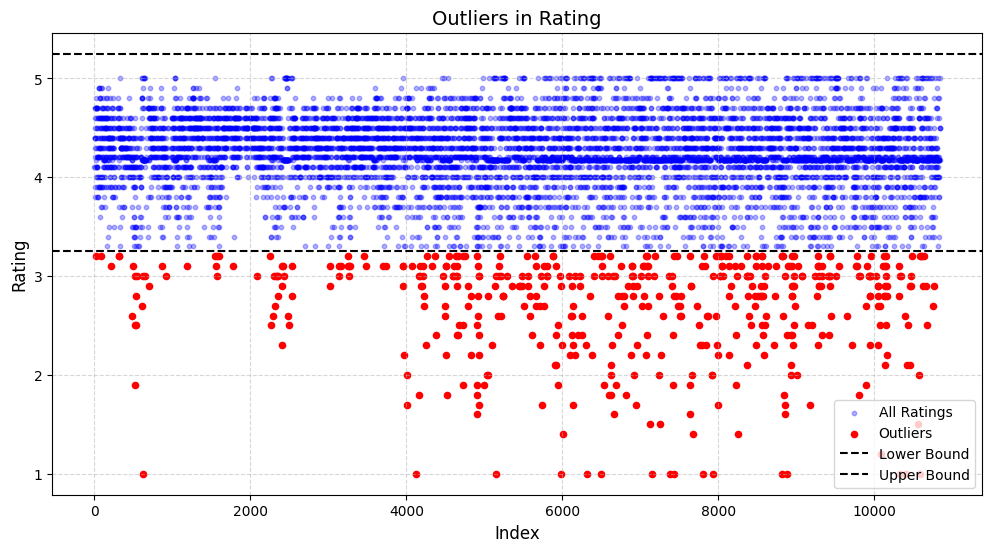

In [27]:
plt.figure(figsize=(12, 6))


plt.scatter(df.index, df['Rating'], color='blue', alpha=0.3, label='All Ratings', s=10)

plt.scatter(outliers.index, outliers['Rating'], color='red', label='Outliers', s=20)


plt.axhline(y=lower_bound, color='black', linestyle='dashed', linewidth=1.5, label='Lower Bound')
plt.axhline(y=higher_bound, color='black', linestyle='dashed', linewidth=1.5, label='Upper Bound')

plt.xlabel('Index', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Outliers in Rating', fontsize=14)

plt.legend(loc='lower right', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


### Analysis

In [28]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

What is the app with the highest number of reviews?

In [29]:
df.sort_values(by='Reviews', ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,Sports,4.2,9992,32505856.0,1000000,Free,0.0,Everyone,2018-05-23,6.5,4.1 and up


Free apps with more than 100 million installs

In [30]:
df.query("Type == 'Free' and Installs > 100_000_000").sort_values(by='Installs',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
152,Google Play Books,Books And Reference,3.9,1433233,0.0,1000000000,Free,0.0,Teen,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,Communication,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,Communication,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,Communication,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,2018-08-01,Varies with device,Varies with device
340,Gmail,Communication,4.3,4604324,0.0,1000000000,Free,0.0,Everyone,2018-08-02,Varies with device,Varies with device
341,Hangouts,Communication,4.0,3419249,0.0,1000000000,Free,0.0,Everyone,2018-07-21,Varies with device,Varies with device
391,Skype - free IM & video calls,Communication,4.1,10484169,0.0,1000000000,Free,0.0,Everyone,2018-08-03,Varies with device,Varies with device
3117,Maps - Navigate & Explore,Travel And Local,4.3,9235155,0.0,1000000000,Free,0.0,Everyone,2018-07-31,Varies with device,Varies with device
2545,Instagram,Social,4.5,66577313,0.0,1000000000,Free,0.0,Teen,2018-07-31,Varies with device,Varies with device
2544,Facebook,Social,4.1,78158306,0.0,1000000000,Free,0.0,Teen,2018-08-03,Varies with device,Varies with device


How many apps that weren't updated in the year of that dataset by percentage? (2018)

In [31]:
print(df[df['Last Updated'].dt.year != 2018].shape[0] / len(df) * 100,"weren't updated that year.")

34.94150533181489 weren't updated that year.


In [32]:
df.query("Category == 'Family' and Type == 'Paid'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
2062,Toca Mystery House,Family,4.200000,96,82837504.0,5000,Paid,3.99,Everyone,2018-06-14,1.0.1,4.4 and up
2085,My Little Princess : Stores,Family,4.300000,169,62914560.0,5000,Paid,2.99,Everyone,2018-05-25,1.08,4.1 and up
2086,Sago Mini Big City,Family,4.200000,8,46137344.0,1000,Paid,3.99,Everyone,2018-07-09,1.1,4.4 and up
2087,Pinkalicious Party,Family,3.000000,2,85983232.0,500,Paid,2.99,Everyone,2018-06-25,1.5.0,4.1 and up
2150,Toca Builders,Family,4.200000,3328,0.0,100000,Paid,3.99,Everyone,2017-07-13,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...
10035,Deus Ex GO,Family,4.500000,9699,24117248.0,100000,Paid,0.99,Teen,2018-07-23,2.1.111374,4.2 and up
10459,SCI-FI UI,Family,4.700000,15,4089446.4,100,Paid,1.99,Everyone,2018-04-16,0.0.53,1.6 and up
10735,FP VoiceBot,Family,4.175052,17,160768.0,100,Paid,0.99,Mature 17+,2015-11-25,1.2,2.1 and up
10785,"sugar, sugar",Family,4.200000,1405,9961472.0,10000,Paid,1.20,Everyone,2018-06-05,2.7,2.3 and up


Most expensive `games`?

In [33]:
df[df['Category'] == 'Game'].sort_values(by='Price', ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
4203,The World Ends With You,Game,4.6,4108,13631488.0,10000,Paid,17.99,Everyone 10+,2015-12-14,1.0.4,4.0 and up
10782,Trine 2: Complete Story,Game,3.8,252,11534336.0,10000,Paid,16.99,Teen,2015-02-27,2.22,5.0 and up
6341,Blackjack Verite Drills,Game,4.6,17,4928307.2,100,Paid,14.00,Teen,2017-07-09,1.1.10,3.0 and up
1838,Star Wars ™: DIRTY,Game,4.5,38207,15728640.0,100000,Paid,9.99,Teen,2015-10-19,1.0.6,4.1 and up
6198,Backgammon NJ for Android,Game,4.4,1644,15728640.0,10000,Paid,7.99,Everyone,2017-04-05,4.1,2.3.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
10791,Winter Wonderland,Game,4.0,1287,39845888.0,50000,Free,0.00,Everyone,2013-12-18,1.0,2.2 and up
10792,Soccer Clubs Logo Quiz,Game,4.2,21661,16777216.0,1000000,Free,0.00,Everyone,2018-05-24,1.3.81,4.0 and up
10793,Sid Story,Game,4.4,28510,81788928.0,500000,Free,0.00,Teen,2018-08-01,2.6.6,4.0.3 and up
10803,Fatal Raid - No.1 Mobile FPS,Game,4.3,56496,84934656.0,1000000,Free,0.00,Teen,2018-08-07,1.5.447,4.0 and up


# Plots

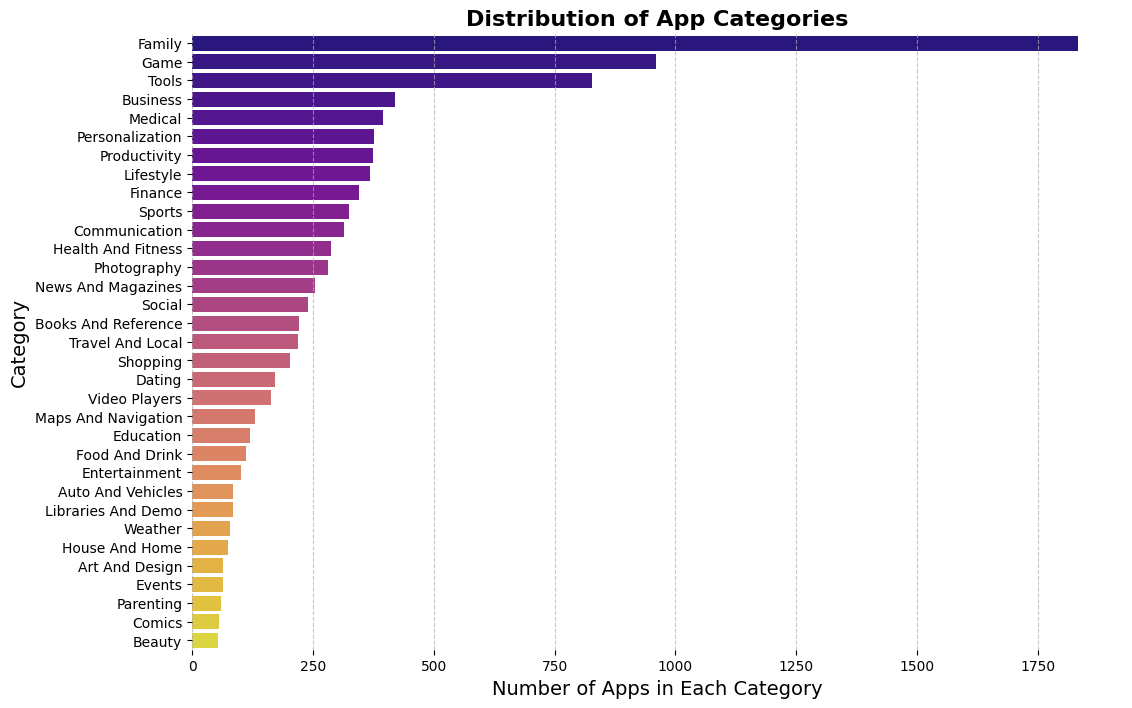

In [34]:
plt.figure(figsize=(12, 8))


category_counts = df['Category'].value_counts()

sns.barplot(
    x=category_counts.values, 
    y=category_counts.index, 
    hue=category_counts.index,  
    dodge=False, 
    palette="plasma", 
    legend=False  
)


plt.title("Distribution of App Categories", fontsize=16, fontweight="bold")
plt.xlabel("Number of Apps in Each Category", fontsize=14)
plt.ylabel("Category", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)

plt.show()


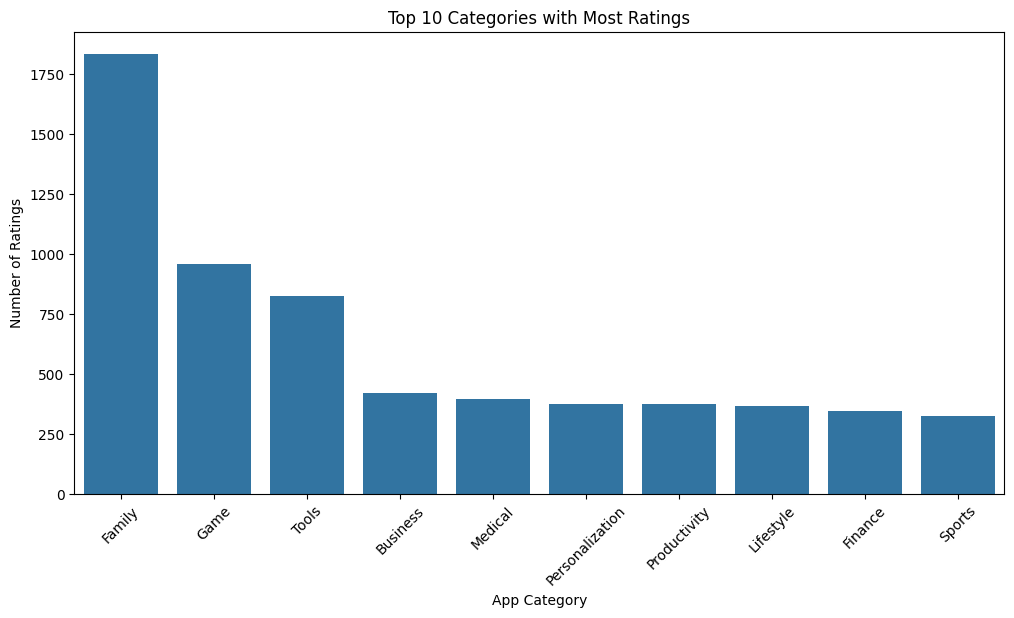

In [35]:
category_ratings = df.groupby("Category")["Rating"].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_ratings.index[:10], y=category_ratings.values[:10])
plt.xticks(rotation=45)
plt.xlabel("App Category")
plt.ylabel("Number of Ratings")
plt.title("Top 10 Categories with Most Ratings")
plt.show()

What influences app ratings the most?

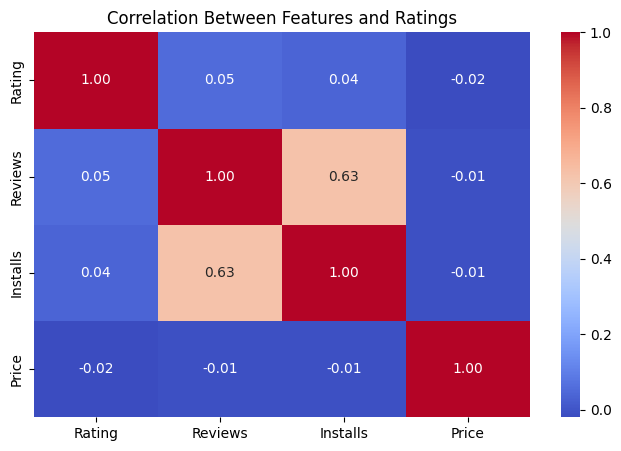


      None of these factors strongly influence app ratings.
      The number of installs and reviews have a slight positive correlation, 
      meaning apps with more installs and reviews might have slightly better ratings, but the relationship is very weak.
      


In [36]:
correlation = df[["Rating", "Reviews", "Installs", "Price"]].corr()

# Visualizing correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features and Ratings")
plt.show()
print('''
      None of these factors strongly influence app ratings.
      The number of installs and reviews have a slight positive correlation, 
      meaning apps with more installs and reviews might have slightly better ratings, but the relationship is very weak.
      ''')

What are the most common app categories for highly-rated apps?

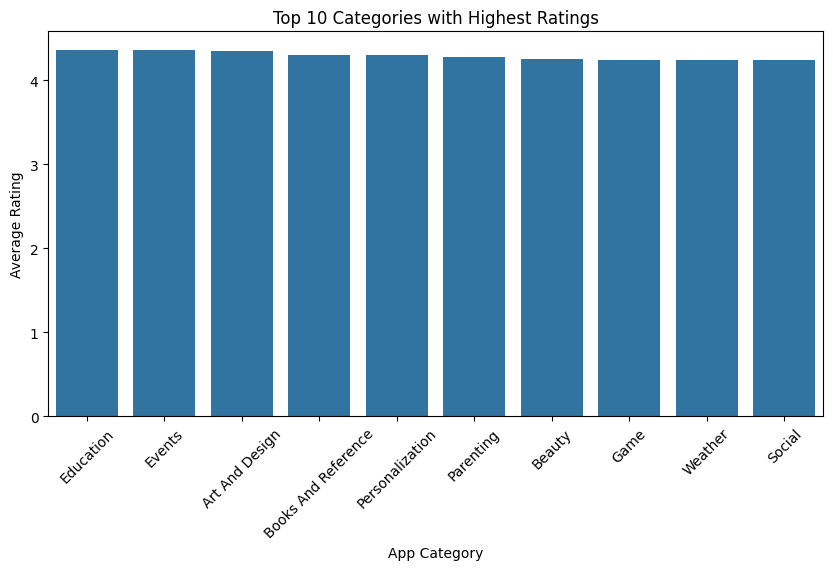

In [37]:
# Group by Category and compute average rating
top_categories = df.groupby("Category")["Rating"].mean().sort_values(ascending=False).head(10)

# Plot the result
plt.figure(figsize=(10, 5))
sns.barplot(x=top_categories.index, y=top_categories.values,legend=False)
plt.xticks(rotation=45)
plt.xlabel("App Category")
plt.ylabel("Average Rating")
plt.title("Top 10 Categories with Highest Ratings")
plt.show()
